In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("life_data.xlsx")

label_name = '주거환경만족도'
cols = ['병원 수','대중교통만족도','문화시설수','부가가치','집값안정화지수','1인당녹지','보육시설수','주거환경만족도']
df.isnull().sum() # 결측치 있는지 확인

Unnamed: 0    0
Unnamed: 1    0
병원 수          0
대중교통만족도       0
문화시설수         0
부가가치          0
집값안정화지수       0
1인당녹지         0
보육시설수         0
주거환경만족도       0
dtype: int64

In [2]:
#폰트설정
import matplotlib.pyplot as plt

# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# 확인 이후
plt.rc('font', family='Malgun Gothic')

['cmtt10', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeTwoSym', 'DejaVu Sans', 'STIXGeneral', 'STIXNonUnicode', 'cmss10', 'DejaVu Sans', 'cmr10', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Serif', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXGeneral', 'cmsy10', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'cmmi10', 'cmb10', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXNonUnicode', 'cmex10', 'Bookman Old Style', 'Bookshelf Symbol 7', 'Maiandra GD', 'Malgun Gothic', 'Bodoni MT', 'High Tower Text', 'Gill Sans MT', 'Perpetua', 'Calibri', 'Dubai', 'Constantia', 'Gill Sans Ultra Bold', 'HCR Dotum', 'Sitka Small', 'Bodoni MT', 'Freestyle Script', 'Constantia', 'Gabriola', 'Franklin Gothic Book', 'Leelawadee', 'Franklin Gothic Medium', 'Lucida Sans Typewriter', 'Palatino

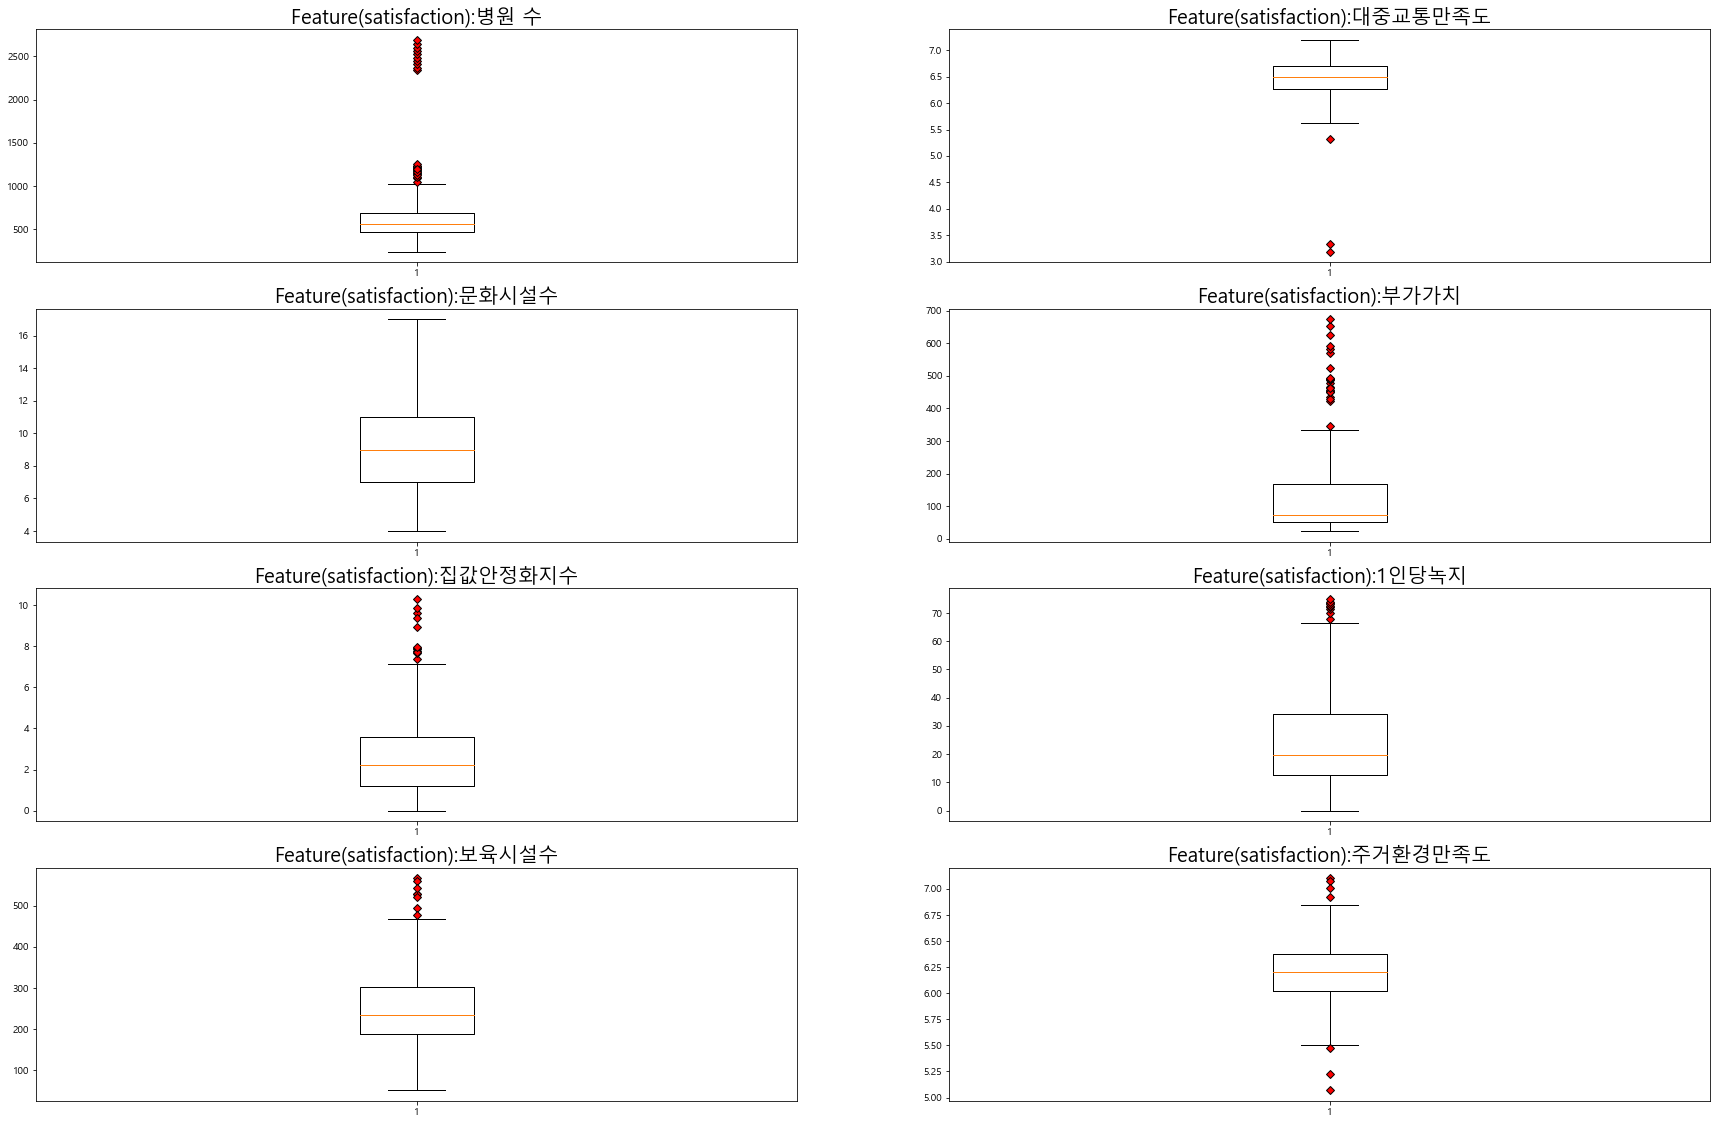

In [3]:
#이상치 확인 / 빨간 마름모는 이상치이므로 제거해야함
df = pd.DataFrame(df)
df = df.iloc[1:,2:]
def boxplot_vis(df, target_name):
    plt.figure(figsize=(30, 30))
    for col_idx in range(len(df.columns)):
        # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
        plt.subplot(6, 2, col_idx+1)
        # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
        plt.boxplot(df[df.columns[col_idx]], flierprops=dict(markerfacecolor='r', marker='D'))
        # 그래프 타이틀: feature name
        plt.title("Feature" + "(" + target_name + "):" + df.columns[col_idx], fontsize=20)
    plt.show()

# 데이터프레임과 target_name 값을 적절하게 정의
target_name = ""  # target_name 값을 원하는 값으로 정의해야 합니다.

# boxplot_vis 함수 호출

boxplot_vis(df,"satisfaction")



In [4]:
def remove_outlier(input_data):
    q1 = input_data.quantile(0.25) # 제 1사분위수
    q3 = input_data.quantile(0.75) # 제 3사분위수
    iqr = q3 - q1 # IQR(Interquartile range) 계산
    minimum = q1 - (iqr * 1.5) # IQR 최솟값
    maximum = q3 + (iqr * 1.5) # IQR 최댓값
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
    df_removed_outlier = input_data[(minimum < input_data) & (input_data < maximum)]
    return df_removed_outlier
df_prep = remove_outlier(df)
df_prep['target'] = 0
df_prep.isnull().sum()


병원 수       26
대중교통만족도     3
문화시설수       3
부가가치       22
집값안정화지수    12
1인당녹지       9
보육시설수       8
주거환경만족도     7
target      0
dtype: int64

In [6]:
df_prep.dropna(axis = 0, how = 'any', inplace = True)
print(f"이상치 포함된 데이터 비율: {round((len(df) - len(df_prep))*100/len(df), 2)}%")
df_prep

이상치 포함된 데이터 비율: 26.28%


,병원 수,대중교통만족도,문화시설수,부가가치,집값안정화지수,1인당녹지,보육시설수,주거환경만족도,target
11,691.0,6.40,4.0,58.26622,0.209864,22.132868,256.0,6.03,0
12,705.0,6.31,5.0,63.13458,1.570681,21.986832,304.0,6.26,0
14,722.0,6.22,5.0,67.24209,0.459770,20.530000,331.0,5.92,0
15,735.0,7.00,5.0,67.46000,1.963048,20.820000,332.0,5.94,0
16,738.0,6.72,5.0,69.11857,7.134768,23.790000,311.0,6.25,0
...,...,...,...,...,...,...,...,...,...
269,483.0,6.38,9.0,35.64990,2.634352,18.800000,262.0,6.27,0
270,490.0,6.36,9.0,38.03053,1.026694,18.930000,260.0,6.16,0
272,498.0,6.74,11.0,41.02403,4.191617,18.230000,241.0,6.44,0
273,511.0,6.83,11.0,43.66141,0.957854,18.520000,230.0,6.48,0


In [7]:
df_prep.to_csv('df_prep.csv')
#전처리를 마친 데이터